In [1]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

In [2]:
%%ferret 
!this cell can be run to clear all background data or variables 
!cancel variables/all
!cancel data/all 

In [3]:
%%ferret 
!this cell calls in ocean data from all four runs 

use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/SRMcooling_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_SRMwarming_500_yearrun/repo/output/ocean/CLIO3a.001506_001.nc

In [4]:
%%ferret
!this cell calls in atmospheric data from all four runs 

use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/SRMcooling_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/control_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc
use /mnt/research/sgary/aparton/data/storage/LOVECLIM1.3/ghg2x_SRMwarming_500_yearrun/repo/output/atmos/atmmmyl001506_001.nc

In [5]:
%%ferret
!sh d 

! Enter_GO fland
! Exit_GO


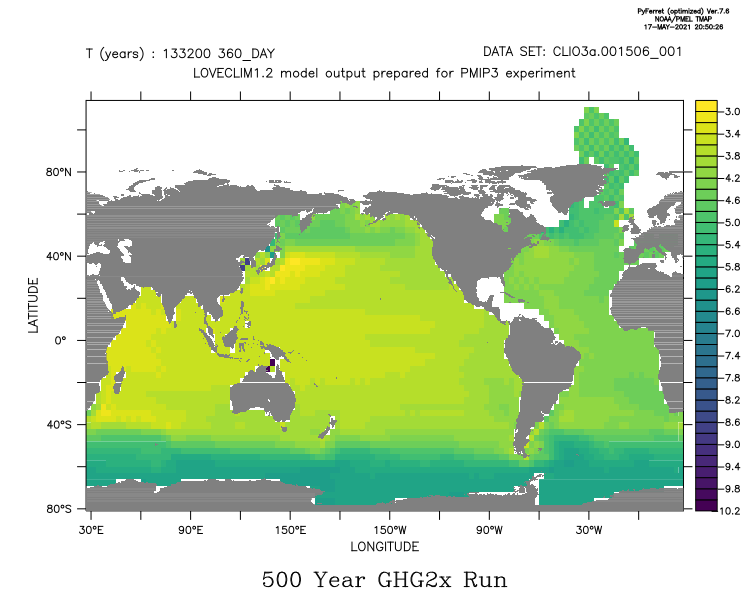

In [6]:
%%ferret
shade /title="500 Year GHG2x Run" SSH[d=3,l=500];go fland 
!shade /title="500 Year Control Run" ssh[d=2,l=500],tlon,tlat;go fland 


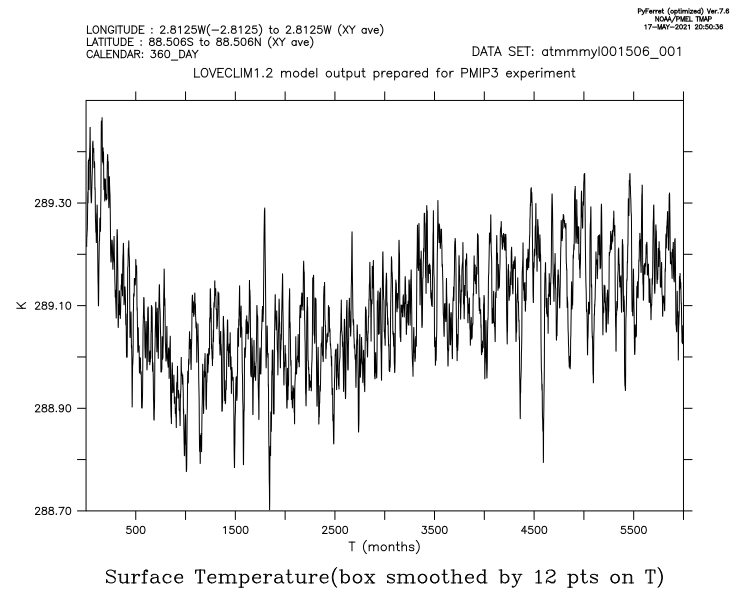

In [7]:
%%ferret
plot ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]


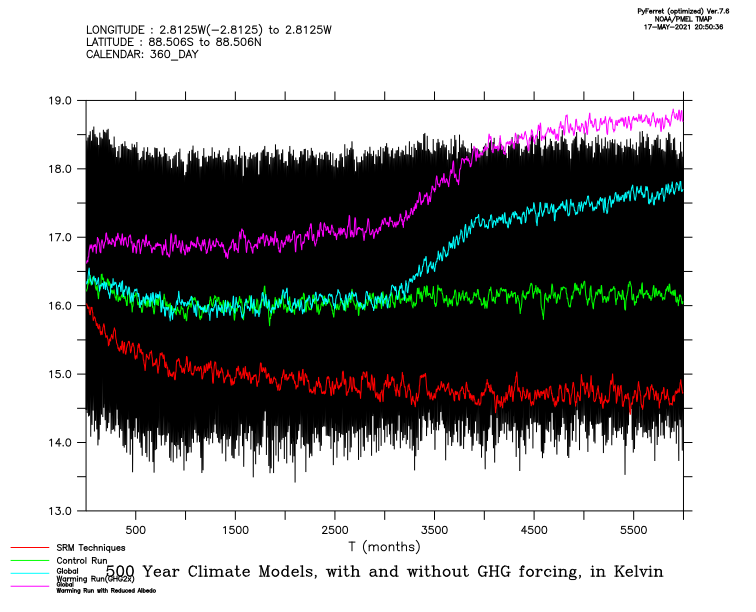

In [8]:
%%ferret
plot /title="500 Year Climate Models, with and without GHG forcing, in Kelvin" ts[x=@AVE,y=@AVE,d=6]-273
plot /over /title="SRM Techniques" /color=2 ts[x=@AVE,y=@AVE,l=@SBX:12,d=5]-273
plot /title="Control Run"/over /color=3 ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]-273
plot /title="Global Warming Run(GHG2x)" /over /color=5 ts[x=@AVE,y=@AVE,l=@SBX:12,d=7]-273
plot /title="Global Warming Run with Reduced Albedo" /over /color=6 ts[x=@AVE,y=@AVE,l=@SBX:12,d=8]-273


In [9]:
%%ferret
!control_ts_Celsius = ts[x=@AVE,y=@AVE,l=@SBX:12,d=5] 
!ghg2x_ts_Celsius = ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]


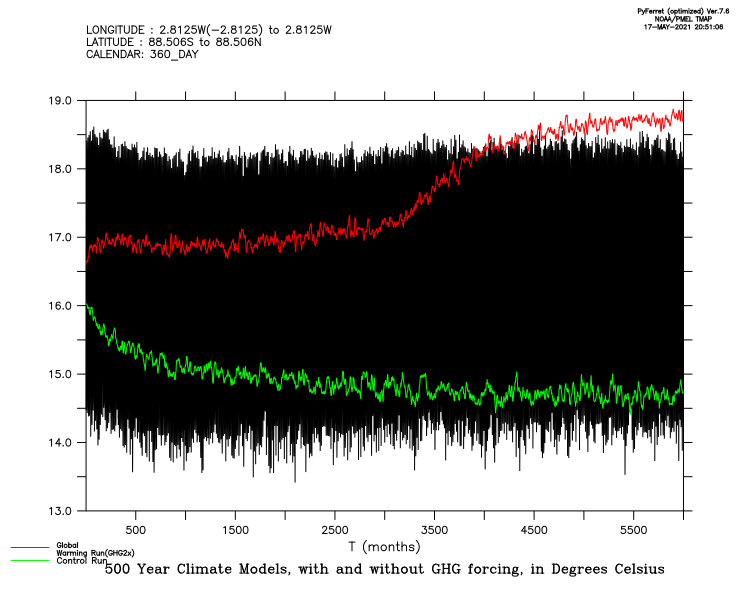

In [10]:
%%ferret
plot /title="500 Year Climate Models, with and without GHG forcing, in Degrees Celsius" ts[x=@AVE,y=@AVE,d=6]-273
plot /title="Global Warming Run(GHG2x)" /over/color=2 ts[x=@AVE,y=@AVE,l=@SBX:12,d=8]-273
plot /title="Control Run"/over/color=3 ts[x=@AVE,y=@AVE,l=@SBX:12,d=5]-273

In [11]:
%%ferret 
!this plot shows the error in the cooling run that led to it having the same output as the control 
!plot /title="Difference between Control and Cooling Runs in Degrees"/color=4 ts[x=@AVE,y=@AVE,l=@SBX:12,d=6]-ts[x=@AVE,y=@AVE,l=@SBX:12,d=8]


In [12]:
%%ferret
!sh d


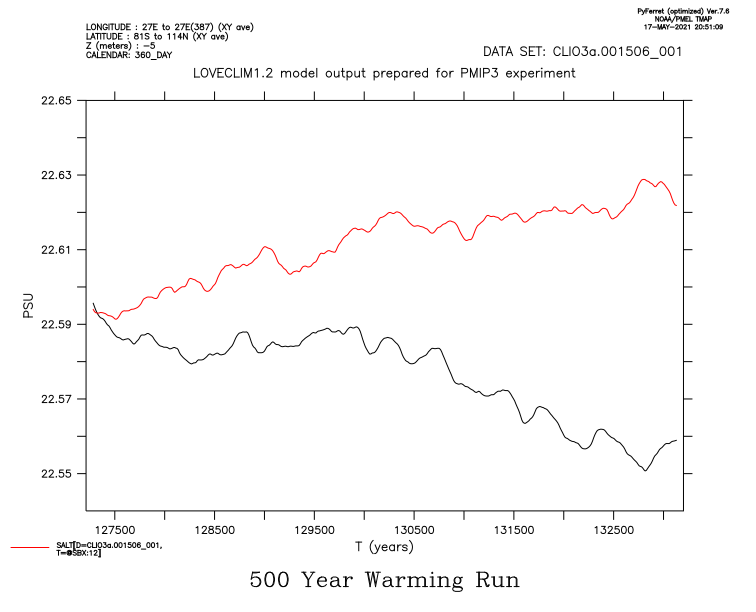

In [13]:
%%ferret
plot /title="500 Year Warming Run" /vlimits=22.54:22.65 SALT[X=@AVE,Y=@AVE,l=@SBX:12,k=20,d=4]
plot /over /color=2  SALT[X=@AVE,Y=@AVE,l=@SBX:12,k=20,d=2]

In [14]:
#below this are calculations for rossby radii between control and experimental runs 

In [15]:
%%ferret
let density_control = rho_un(SALT[d=2],TEMP[d=2],0)
let density_control_masked = if density_control gt 1000.0 then density_control
!shade density_control[k=20,l=1]
let drhodz = density_control_masked[k=@DDC]
let drhodz_masked = if drhodz gt 0 then 0 else drhodz
let n_squared = (-9.81/1027)*drhodz_masked
let n = n_squared^0.5

!now we will integrate the buoyancy frequency and multiply by 1/pi to get c, the phase speed
let c = (1.0/3.14159)* n[k=@DIN]
!shade c[l=1]; go fland
let rr = c/abs(FCOR[d=2,i=1:120,j=1:65])/1000
!shade rr[l=1];go fland

let density_ghg2x = rho_un(SALT[d=3],TEMP[d=3],0)
let density_ghg2x_masked = if density_ghg2x gt 1000.0 then density_ghg2x
!shade density_control[k=20,l=1]
let drhodz_ghg2x = density_ghg2x_masked[k=@DDC]
let drhodz_ghg2x_masked = if drhodz_ghg2x gt 0 then 0 else drhodz_ghg2x
let n_squared_ghg2x = (-9.81/1027)*drhodz_ghg2x_masked
let n_ghg2x = n_squared_ghg2x^0.5

!now we will integrate the buoyancy frequency and multiply by 1/pi to get c, the phase speed
let c_ghg2x = (1.0/3.14159)* n_ghg2x[k=@DIN]
!shade c[l=1]; go fland
let rr_ghg2x = c_ghg2x/abs(FCOR[d=4,i=1:120,j=1:65])/1000
!shade rr[l=1];go fland


!these lists below are just used for testing purposes while coding this 
!list density_control_masked[x=100,y=0,l=1]  !y=0 will get you to the equator, but j=27 will do the same 
!list drhodz_masked[i=100,y=0,l=1]
!list n_squared[]



In [16]:
%%ferret
!this will calculate phase speed and rossby radius for the SRM cooling and SRM-GHG2x runs 

let density_cooling = rho_un(SALT[d=1],TEMP[d=1],0)
let density_cooling_masked = if density_cooling gt 1000.0 then density_cooling
let drhodz_cooling = density_cooling_masked[k=@DDC]
let drhodz_cooling_masked = if drhodz_cooling gt 0 then 0 else drhodz_cooling
let n_squared_cooling = (-9.81/1027)*drhodz_cooling_masked
let n_cooling = n_squared_cooling^0.5

!now we will integrate the buoyancy frequency and multiply by 1/pi to get c, the phase speed
let c_cooling = (1.0/3.14159)* n_cooling[k=@DIN]
let rr_cooling = c_cooling/abs(FCOR[d=4,i=1:120,j=1:65])/1000


let density_SRMwarming = rho_un(SALT[d=4],TEMP[d=4],0)
let density_SRMwarming_masked = if density_SRMwarming gt 1000.0 then density_SRMwarming
let drhodz_SRMwarming = density_SRMwarming_masked[k=@DDC]
let drhodz_SRMwarming_masked = if drhodz_SRMwarming gt 0 then 0 else drhodz_SRMwarming
let n_squared_SRMwarming = (-9.81/1027)*drhodz_SRMwarming_masked
let n_SRMwarming = n_squared_SRMwarming^0.5

!now we will integrate the buoyancy frequency and multiply by 1/pi to get c, the phase speed
let c_SRMwarming = (1.0/3.14159)* n_SRMwarming[k=@DIN]
let rr_SRMwarming = c_SRMwarming/abs(FCOR[d=4,i=1:120,j=1:65])/1000



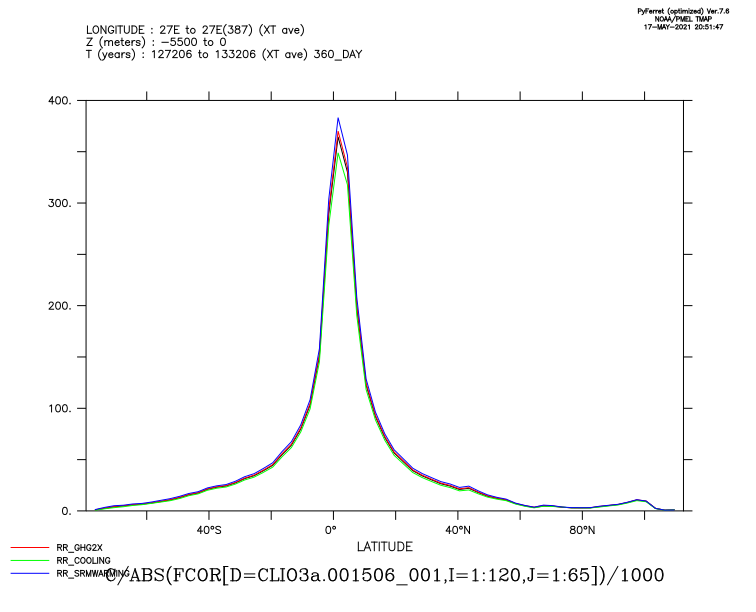

In [17]:
%%ferret
plot /color=1 rr[l=@AVE,x=@AVE]
plot /over /color=2 rr_ghg2x[l=@AVE,x=@AVE]
plot /over /color=3 rr_cooling[l=@AVE,x=@AVE]
plot /over /color=4 rr_SRMwarming[l=@AVE,x=@AVE]





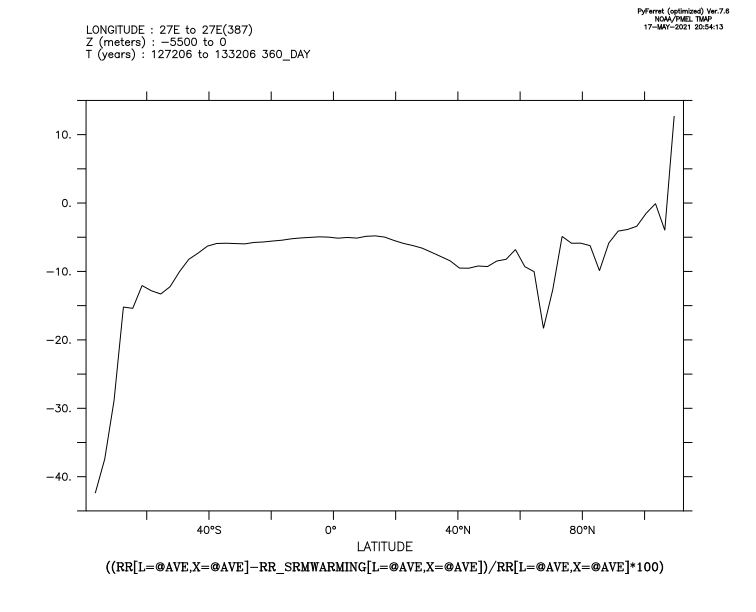

In [18]:
%%ferret
!this cell will allow us to visualize the percent differences between rossby radius of scenarios and the control scenario 

!global cooling scenario (SRM)
plot ((rr[l=@AVE,x=@AVE]-rr_cooling[l=@AVE,x=@AVE])/rr[l=@AVE,x=@AVE]*100)

!global warming(ghg2x) scenario
plot ((rr[l=@AVE,x=@AVE]-rr_ghg2x[l=@AVE,x=@AVE])/rr[l=@AVE,x=@AVE]*100)

!extreme global warming scenario(ghg2x and SRM)
plot ((rr[l=@AVE,x=@AVE]-rr_SRMwarming[l=@AVE,x=@AVE])/rr[l=@AVE,x=@AVE]*100)









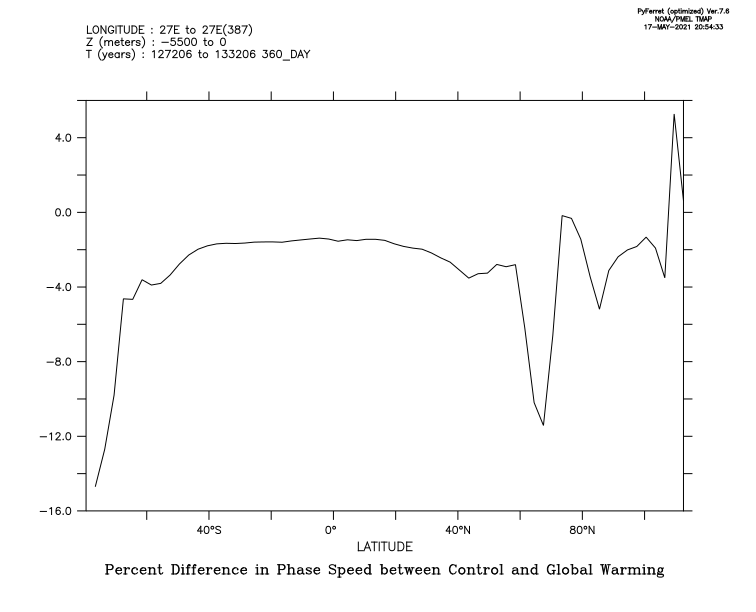

In [19]:
%%ferret 
!this cell will plot phase speed of control and global warming scenarios as well as the difference between them 
!plot c[l=@AVE,x=@AVE]
!plot /over /color=1 c_ghg2x[l=@AVE,x=@AVE]
!this line below will plot the differences between the control and global warming
!plot c[l=@AVE,x=@AVE]-c_ghg2x[l=@AVE,x=@AVE]
!the line below will calculate the percent difference over latitude 
plot /title = "Percent Difference in Phase Speed between Control and Global Warming" ((c[l=@AVE,x=@AVE]-c_ghg2x[l=@AVE,x=@AVE])/c[l=@AVE,x=@AVE])*100


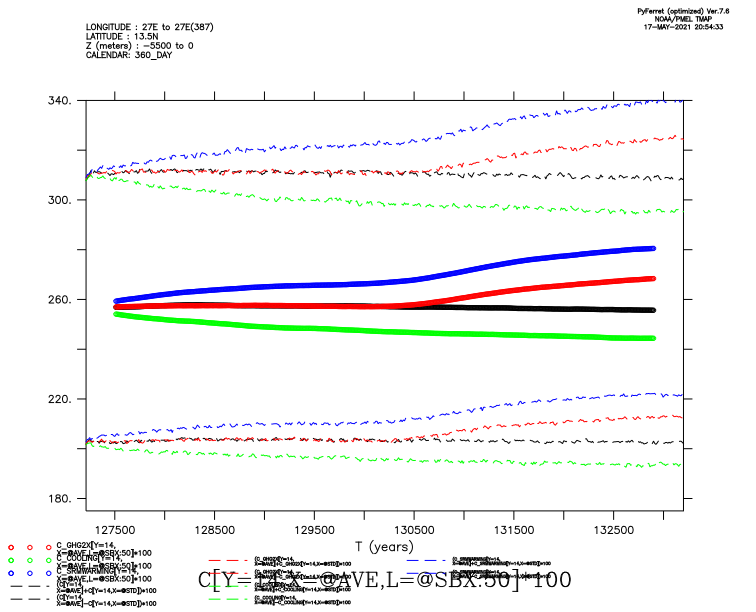

In [20]:
%%ferret
!Chelton et al method for phase speed calculation 
!this cell will attempt to recreate Figure 3 from Fyfe and Saenko 2007 but uses c as calculated in Chelton et al 1998
!let c_time_adjusted = if c[l] gt 1000.0 then c[l]-127500 
!until now, c has been in m/s. to match fyfe and saenko we need to multiply by 100 to get cm/s but this does not seem realistic for a phase speed

!the two lines below show average phase speed at 14 degrees North in cm/s 
plot /vlimits=175:340 /symbol=27  c[y=14,x=@AVE,l=@SBX:50]*100
plot /over /color=2 /symbol=27 c_ghg2x[y=14,x=@AVE,l=@SBX:50]*100
plot /over /color=3 /symbol =27 c_cooling[y=14,x=@AVE,l=@SBX:50]*100
plot /over /color=4 /symbol =27 c_SRMwarming[y=14,x=@AVE,l=@SBX:50]*100

!the two lines below plot the standard deviation of phase speed at 14 degrees North in cm/s 
!plot  /vlimits=53:56 /symbol=27  c[y=14,x=@STD,l=@SBX:50]*100
!plot /over /color=2 /symbol=27 c_ghg2x[y=14,x=@STD,l=@SBX:50]*100

!the lines below will plot the standard error bars for each of the respective model scenarios(global cooling, status quo, ghg2x global warming,and SRM ghg2x)

plot /over /dash (c[y=14,x=@AVE]+c[y=14,x=@STD])*100
plot /over /dash (c[y=14,x=@AVE]-c[y=14,x=@STD])*100

plot /over /dash /color=2 (c_ghg2x[y=14,x=@AVE]+c_ghg2x[y=14,x=@STD])*100
plot /over /dash /color=2 (c_ghg2x[y=14,x=@AVE]-c_ghg2x[y=14,x=@STD])*100

plot /over /dash /color=3 (c_cooling[y=14,x=@AVE]+c_cooling[y=14,x=@STD])*100
plot /over /dash /color=3 (c_cooling[y=14,x=@AVE]-c_cooling[y=14,x=@STD])*100

plot /over /dash /color=4 (c_SRMwarming[y=14,x=@AVE]+c_SRMwarming[y=14,x=@STD])*100
plot /over /dash /color=4 (c_SRMwarming[y=14,x=@AVE]-c_SRMwarming[y=14,x=@STD])*100



In [ ]:
%%ferret
plot /color=1 /vlimits=0:340 /symbol=27  c[y=14,x=@AVE,l=@SBX:50]*100
plot /color=1 /over /dash (c[y=14,x=@AVE]+c[y=14,x=@STD])*100
plot /color=1 /skipsym /over /dash (c[y=14,x=@AVE]-c[y=14,x=@STD])*100


!plot /over /dash /color=2 (c_ghg2x[y=14,x=@AVE]+c_ghg2x[y=14,x=@STD])*100
!plot /over /dash /color=2 (c_ghg2x[y=14,x=@AVE]-c_ghg2x[y=14,x=@STD])*100

!plot /over /dash /color=3 (c_cooling[y=14,x=@AVE]+c_cooling[y=14,x=@STD])*100
!plot /over /dash /color=3 (c_cooling[y=14,x=@AVE]-c_cooling[y=14,x=@STD])*100

!plot /over /dash /color=4 (c_SRMwarming[y=14,x=@AVE]+c_SRMwarming[y=14,x=@STD])*100
!plot /over /dash /color=4 (c_SRMwarming[y=14,x=@AVE]-c_SRMwarming[y=14,x=@STD])*100


In [ ]:
%%ferret
!due to the major difference between the phase speed calculations in Fyfe and Saenko 2007 and in Chelton et al 1998, we will now mimic the Fyfe and Saenko 
!calculations, based on equation 3 in Fyfe and Saenko 2007
!equation: c= beta * (rossby radius)^2
    
!let R = 6371000    !this is the earths radius in centimeters
!let omega = 2*(3.14159)/(24*60*60) !this is the rotation rate of the earth, in rad/second
!let theta = 14
!let beta = 2*omega*cos(theta*(3.14159/180))/R
!list beta
!list rr 

!let c_FS = beta*(rr)^2
!plot c_FS[y=14,x=@AVE,l=500]
!list c_FS[x=@AVE,y=14,l=500]





In [ ]:
%%ferret
!this visualizes the percent differences between the rossby radius in the control and global warming scenarios 
plot ((rr[l=@AVE,x=@AVE]-rr_ghg2x[l=@AVE,x=@AVE])/rr[l=@AVE,x=@AVE])*100


In [ ]:
%%ferret 
sh d 

In [ ]:
%%ferret 
!this cell will attempt to calculate difference between global warming and status quo scenarios 
!      in total precipation over the 500 years and map it over the globe
!this is subtracting the status quo from the global warming scenario, so positive numbers mean precip 
!      increased with warming

let difference = pp[d=7,l=@ave]-pp[d=6,l=@ave]
shade difference;go fland 

!this is just a test to try to highlight the places with the greatest loss in precip 
!let worst_impacts = if difference le (-10) then (-100) else difference
!shade worst_impacts;go fland 

!using contour works much better than the above shading efforts 
contour /over /color=2 /levels = (-10,0,1) difference


In [ ]:
%%ferret
!this will attempt to plot precipitation changes from warming over a north-south slice at longitude of 65 degrees west
!chose this longitude because there is a large amount of land at this longitude from north to south 
plot pp[d=7,l=@AVE,x=65]-pp[d=6,l=@AVE,x=65]

In [ ]:
%%ferret 
!this cell will hopefully show the average MSL on a shade map before warming
let msl_before_ghg = msl[d=3,l=1:250]
shade msl_before_ghg[l=@AVE];go fland

In [ ]:
%%ferret
!this will shade the MSL(the gent-mcwilliams slope) 
!shade msl[d=2,l=500];go fland
!shade msl[d=3,l=500];go fland

let msl_after_ghg = msl[d=3,l=250:500]
shade msl_after_ghg[l=@AVE];go fland

let msl_difference = msl[d=2,l=@AVE]- msl[d=3,l=@AVE]
!shade msl_difference;go fland

let abs_msl_difference = abs(msl_difference)
!contour /over /color=2 /levels =(1.5,1,0.1) abs_msl_difference
!list abs_msl_difference[l=500,y=60]

In [ ]:
%%ferret 
let msl_difference_2= log(msl_after_ghg[l=@AVE] - msl_before_ghg[l=@AVE])
shade /title="Difference in MSL between Non-warming and Warming" msl_difference_2;go fland
!list msl_before_ghg[l=@AVE] - msl_after_ghg[l=@AVE]
list msl_difference_2[I=@AVE,J=@AVE]

In [ ]:
%%ferret 
!this cell is just for playing around with the vector command
vector /d=3 /length=0.5 u[l=250,k=20],v[l=250,k=20]; go fland
!vector /d=3 /length=0.5 u[l=500,k=20],v[l=500,k=20]; go fland